# Newton-Raphson Multidimensional

## Problema 3

### 3.3.1 Parte a: Función de Rosenbrock (3D)

Se va a implementar el método de Newton-Raphson multidimensional para encontrar los mínimos y máximos de la siguiente función:
$$
f(x,y) = (x-1)^2 +100 (y-x^2)^2
$$
en el punto (0,10)

In [1]:
import numpy as np
import scipy as sp
from scipy.misc import derivative
import sympy as sp
import random
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

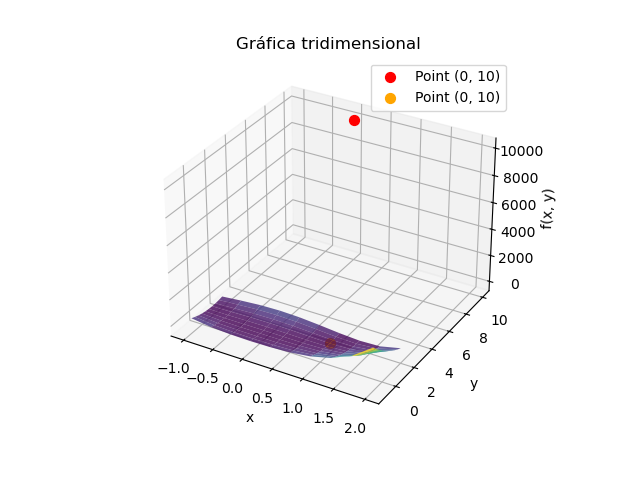

In [17]:
%matplotlib widget 
# Función f(x,y)
f = lambda x, y: (x - 1)**2 + 100 * (y - x**2)**2

x = np.linspace(-1, 2, 10)
y = np.linspace(-1, 2, 10)
  
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(0, 10, f(0, 10), color='red', s=50, label='Point (0, 10)')
ax.scatter(1, 1, f(1, 1), color='orange', s=50, label='Point (0, 10)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gráfica tridimensional')
ax.legend()

plt.show()

#### Gradiente de f(x,y):

In [19]:
x, y = sp.symbols('x y', real=True)
func = (x - 1)**2 + 100 * (y - x**2)**2
def vector_grad(func, x,y):

    dif_x = sp.diff(func, x)
    dif_y = sp.diff(func,y)
    #Evaluar en el punto (0,10)
    grad_x_func = sp.lambdify((x, y), dif_x, 'numpy')
    grad_y_func = sp.lambdify((x, y), dif_y, 'numpy')
    return grad_x_func, grad_y_func

grad_x, grad_y = vector_grad(func, x, y)
print(f"los valores del gradiente en (0,10) son {grad_x(0,10)} y {grad_y(0,10)}")

los valores del gradiente en (0,10) son -2 y 2000


#### Matriz hessiana de f(x,y):

In [20]:
def calc_hessiana (func, x, y):
    # Primeras derivadas
    dif_x = sp.diff(func, x)
    dif_y = sp.diff(func, y)
    # Segundas derivadas
    dif_xx = sp.diff(dif_x, x)  #dx^2
    dif_xy = sp.diff(dif_x, y)  #dxdy
    dif_yx = sp.diff(dif_y, x)  #dydx
    dif_yy = sp.diff(dif_y, y)  #dy^2

    #Matriz
    Hessiana = sp.Matrix([[dif_xx, dif_xy], [dif_yx, dif_yy]])

    # Matriz Hessiana en el punto de inicio
    Hessiana_punto = Hessiana.subs({x: 0, y: 10})
    return Hessiana,Hessiana_punto
Hessiana, Hessiana_punto = calc_hessiana(func, x,y)
# Print the Hessian matrix
print("Matriz Hessiana:")
print(Hessiana)

print("Matriz evaluada en (0, 10):")
sp.pprint(Hessiana_punto)

Matriz Hessiana:
Matrix([[1200*x**2 - 400*y + 2, -400*x], [-400*x, 200]])
Matriz evaluada en (0, 10):
⎡-3998   0 ⎤
⎢          ⎥
⎣  0    200⎦


In [25]:
def Multi_2D_Newton(func, tolerance, x_inicial,y_inicial, x, y):
    grad_x_func, grad_y_func = vector_grad(func, x, y)
    
    # Compute Hessian matrix
    Hessiana, H_punto = calc_hessiana(func, x, y)
    hess_xx_func = sp.lambdify((x, y), Hessiana[0, 0], 'numpy')
    hess_xy_func = sp.lambdify((x, y), Hessiana[0, 1], 'numpy')
    hess_yx_func = sp.lambdify((x, y), Hessiana[1, 0], 'numpy')
    hess_yy_func = sp.lambdify((x, y), Hessiana[1, 1], 'numpy')
    
    n = 0
    actual_tol = 999
    x_k = np.array([x_inicial,y_inicial], dtype=float)
    max_iter = 1000
    
    while actual_tol > tolerance and n < max_iter:
        #Gradiente evaluado en el punto
        grad = np.array([grad_x_func(x_k[0], x_k[1]), grad_y_func(x_k[0], x_k[1])], dtype=float)
        #Hessiana evaluada en el punto
        hess = np.array([[hess_xx_func(x_k[0], x_k[1]), hess_xy_func(x_k[0], x_k[1])],
                         [hess_yx_func(x_k[0], x_k[1]), hess_yy_func(x_k[0], x_k[1])]], dtype=float)
        
        #Esto sirve somehow
        x_kplus1 = x_k - np.linalg.solve(hess, grad)
        
        actual_tol = np.linalg.norm(x_kplus1 - x_k)
        print(f"Norma del gradiente: {actual_tol}")
        n += 1
        x_k = x_kplus1
    
    eigenvals = np.linalg.eigvals(hess)
    if all(eig > 0 for eig in eigenvals):
        optimo = "min"
        print(f"Mínimo local comenzando en ({x_inicial}, {y_inicial}) = {x_kplus1}")
    elif all(eig < 0 for eig in eigenvals):
        optimo = "max"
        print(f"Máximo local comenzando en ({x_inicial}, {y_inicial}) = {x_kplus1}")
    else:
        optimo = "saddle"
        print(f"Punto de silla en (x, y) = {x_kplus1}")
    
    return optimo, x_kplus1, actual_tol

valor_tol = 0.001
optimo, punto_resp, actual_tol = Multi_2D_Newton(func, valor_tol, 0,10, x,y)

Norma del gradiente: 10.000000012512508
Norma del gradiente: 1.0004506780313538
Norma del gradiente: 1.0009010555356654
Norma del gradiente: 0.0001114046829316983
Mínimo local comenzando en (0, 10) = [1. 1.]
